<a href="https://colab.research.google.com/github/hfmandell/ML-Practice/blob/main/amphibians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Amphibians Data Set
## Author: Hannah Mandell

https://archive.ics.uci.edu/ml/datasets/Amphibians

Abstract: The dataset is a multilabel/multiclass classification problem. The goal is to predict the presence of amphibians species near the water reservoirs based on features obtained from GIS systems and satellite images

In [8]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import csv

import matplotlib.pyplot as plt

In [9]:
import pandas as pd
import scipy
from scipy.io import arff
import re

data = pd.read_csv('amphibians.csv')
df = pd.DataFrame(data)

df.head()

,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,FR,OR,RR,BR,MR,CR,Green frogs,Brown frogs,Common toad,Fire-bellied toad,Tree frog,Common newt,Great crested newt
0,600,1,1,4,6,2,10,0,0,50,0,0,0,1,0,0,0,0,0,0,0
1,700,1,5,1,10,6,10,3,1,75,1,1,0,1,0,1,1,0,0,1,0
2,200,1,5,1,10,6,10,3,4,75,1,1,0,1,0,1,1,0,0,1,0
3,300,1,5,0,6,10,2,3,4,25,0,0,0,1,0,0,1,0,0,0,0
4,600,2,1,4,10,2,6,0,0,99,0,5,0,1,0,1,1,1,0,1,1


In [52]:
df.shape

(189, 21)

In [53]:
df.columns

Index(['SR', 'NR', 'TR', 'VR', 'SUR1', 'SUR2', 'SUR3', 'UR', 'FR', 'OR', 'RR',
       'BR', 'MR', 'CR', 'Green frogs', 'Brown frogs', 'Common toad',
       'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt'],
      dtype='object')

In [86]:
df['Green frogs'].value_counts()[1]

108

In [87]:
df['Brown frogs'].value_counts()[1]

148

In [88]:
df['Common toad'].value_counts()[1]

124

Bar plot visualization showing the total amphibian counts for each organism:

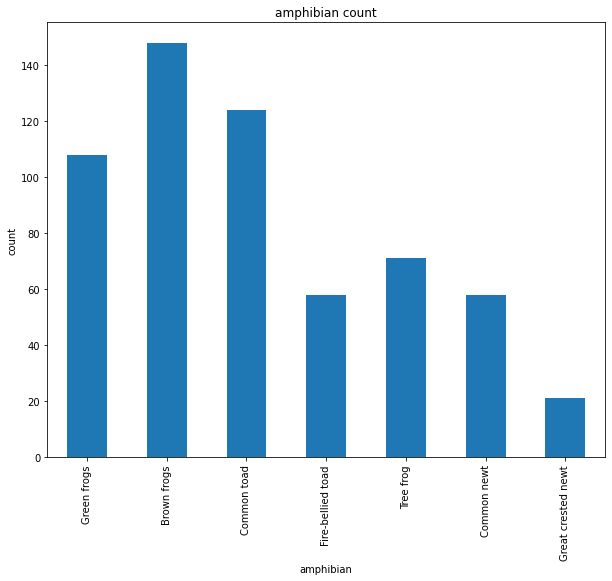

In [221]:
amphib_labels = data[["Green frogs", "Brown frogs", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt"]]

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size
plt.title('amphibian count')
plt.ylabel('count')
plt.xlabel('amphibian')

amphib_labels.sum(axis=0).plot.bar()

Brown Frogs appear to be the most prevalent amphibians, closely followed by Common toads and Green frogs, whereas Great crested newts are the least common. 

## Using a Single Dense Output Layer
The data is already cleaned, courtesy of UCI ML Institute. I removed two columns that UCI said weren't relevant to the analysis. 

Next, we create our input and output data.

# A.1 Storing our Input & Output Data
The columns: SR,	NR,	TR,	VR,	SUR1,	SUR2,	SUR3,	UR,	FR,	OR,	RR,	BR,	MR,	and CR will serve as our input data. \
The amphibian classifiers will are our output data: Green frogs,	Brown frogs,	Common toad,	Fire-bellied toad,	Tree frog,	Common newt,	Great crested newt

In [ ]:
# split into input (X) and output (y) variables
X = df.iloc[0:189,0:14]
y = df.iloc[0:189,14:21]

X, y

In [213]:
# we split our input & output data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [ ]:
X_test, y_test

## A.2 Building our Model

In [214]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import matplotlib.pyplot as plt


# Configuration options: the second step is specifying a set of configuration options for dataset generation and the model. For example, we create 10000 samples with 6 features (i.e. columns) per sample (or vector/array), which have 3 target classes of which 2 are ‘activated’ per sample on average. We will train for 50 iterations (epochs), initialize our random number generators with a seed of 42, use a 250-sample batch size, output everything on stdout through verbosity = 1 and use 20% of the training data for validation purposes.


In [215]:
# Configuration
n_features = 14
n_classes = 7

# make model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=n_features))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(n_classes, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [216]:
print(model.summary())

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_123 (Dense)            (None, 64)                960       
_________________________________________________________________
dense_124 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_125 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_126 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_127 (Dense)            (None, 7)                 63        
Total params: 3,767
Trainable params: 3,767
Non-trainable params: 0
_________________________________________________________________
None


Printing the architechture of our neural network:

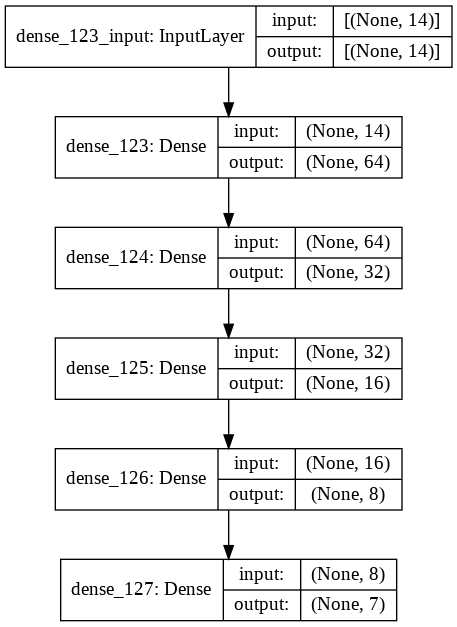

In [217]:
from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)


## A.3 Training our Model

In [218]:
history = model.fit(X_train, y_train, epochs=10, batch_size = 30, verbose=2, validation_split=0.2)

Epoch 1/10
5/5 - 1s - loss: 0.7052 - acc: 0.1176 - val_loss: 0.6957 - val_acc: 0.0294
Epoch 2/10
5/5 - 0s - loss: 0.6918 - acc: 0.0515 - val_loss: 0.6977 - val_acc: 0.0588
Epoch 3/10
5/5 - 0s - loss: 0.6909 - acc: 0.0588 - val_loss: 0.6981 - val_acc: 0.0588
Epoch 4/10
5/5 - 0s - loss: 0.6898 - acc: 0.0588 - val_loss: 0.6964 - val_acc: 0.0588
Epoch 5/10
5/5 - 0s - loss: 0.6887 - acc: 0.0588 - val_loss: 0.6941 - val_acc: 0.0588
Epoch 6/10
5/5 - 0s - loss: 0.6878 - acc: 0.0515 - val_loss: 0.6920 - val_acc: 0.0588
Epoch 7/10
5/5 - 0s - loss: 0.6867 - acc: 0.0515 - val_loss: 0.6902 - val_acc: 0.0588
Epoch 8/10
5/5 - 0s - loss: 0.6862 - acc: 0.1397 - val_loss: 0.6890 - val_acc: 0.3235
Epoch 9/10
5/5 - 0s - loss: 0.6850 - acc: 0.2941 - val_loss: 0.6900 - val_acc: 0.3235
Epoch 10/10
5/5 - 0s - loss: 0.6838 - acc: 0.3015 - val_loss: 0.6955 - val_acc: 0.3235


## A.4 Evaluating our Model on the Test Set

In [219]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

1/1 [==============================] - 0s 15ms/step - loss: 0.6983 - acc: 0.5263
Test Loss: 0.6982775926589966
Test Accuracy: 0.5263158082962036


Average of 47% accuracy under the current model (using different data as training data), a low value. This might be attributeed to the smaller sample size. 

---



## A.5 Is the Model Overfitting?

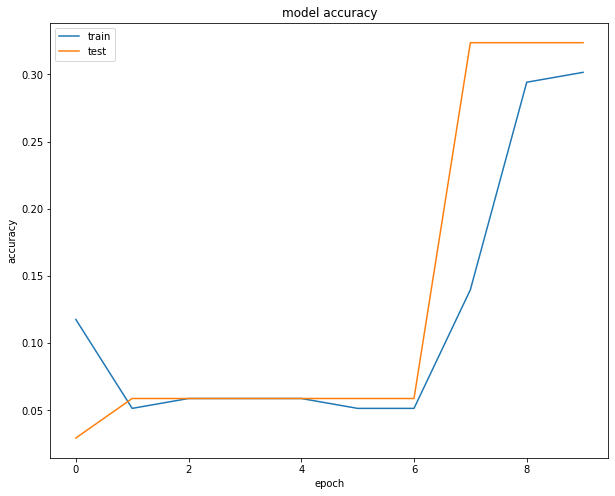

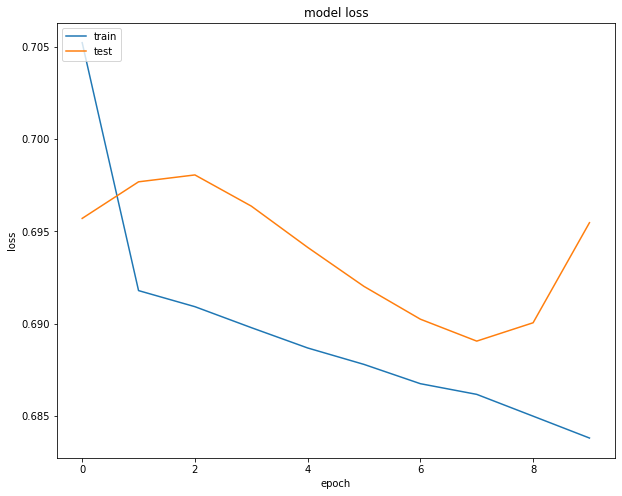

In [220]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

No, the model is not over-fitting, as is evident by the lack of convergence between the two lines.